# Bond length distributions 

In [34]:
from utils import readStructs
from ase.geometry.analysis import Analysis
import numpy as np
import matplotlib.pyplot as plt 
import itertools

def getBondDists(directories, names, e1, e2, zcut = 10, **kwargs):
    dfs = []
    bondLengthLists = []
    for directory, name in zip(directories,names):
        data = readStructs(directory, name = name, **kwargs)
        # don't want bond data for the bottom z Å of slab
        for geom in data['geom']:
            del geom[[i.index for i in geom if i.position[2] < zcut]]
        data['analysis'] = [Analysis(i) for i in data['geom']]
        data['SiN bonds'] = [i.get_bonds(e1, e2) for i in data['analysis']]
        data['SiN bond lengths'] = [i.get_values(j) for i,j in zip(data['analysis'], data['SiN bonds'])]
        aggregatedBondLengths = [i[0] for i in data['SiN bond lengths']]
        aggregatedBondLengths = list(itertools.chain(*aggregatedBondLengths))
        dfs += [data]
        bondLengthLists += [aggregatedBondLengths]
    return dfs, bondLengthLists

In [35]:
dirs = ["../transmuted.k=2/", 
        "../transmuted.k=2.outslab0/", 
        "../transmuted.k=2.outslab1/", 
        "../transmuted.k=2.outslab2/"]
names = ["slab", "slab", "slab", "slab"]
# dfsSiN, bondLengthsSiN = getBondDists(dirs, names, "Si", "N", zcut = 10, shallow = False)
dfsSiC, bondLengthsSiC = getBondDists(dirs, names, "Si", "C", zcut = 10, shallow = False)

In [33]:
np.array(bondLengthsSiC[0]) -  np.array(bondLengthsSiN[0])

array([0., 0., 0., ..., 0., 0., 0.])

Text(0.5, 1.0, 'Distributions of SiC bond length')

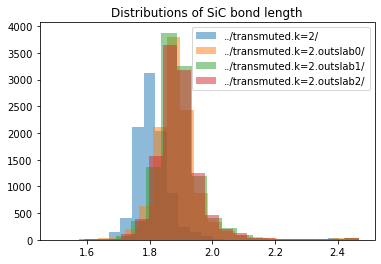

In [39]:
for dist, d in zip(bondLengthsSiC, dirs):
    plt.hist(dist, bins = 20, label = d, alpha = 0.5);
plt.legend()
plt.title("Distributions of SiC bond length")

In [40]:
for dist, d in zip(bondLengthsSiC, dirs):
    print(d)
    print("mean: {}".format(round(np.mean(dist), 2)))
    print("sd: {}".format(round(np.std(dist), 2)))

../transmuted.k=2/
mean: 1.81
sd: 0.06
../transmuted.k=2.outslab0/
mean: 1.89
sd: 0.08
../transmuted.k=2.outslab1/
mean: 1.89
sd: 0.08
../transmuted.k=2.outslab2/
mean: 1.89
sd: 0.08


(array([1, 2, 3, 4]), <a list of 4 Text xticklabel objects>)

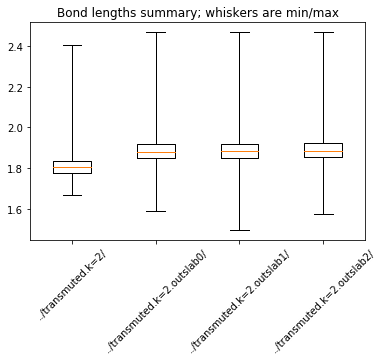

In [41]:
plt.boxplot(bondLengthsSiC, whis=np.inf, labels = dirs);
plt.title("Bond lengths summary; whiskers are min/max")
plt.xticks(rotation = 45)

# Transmutation

In [ ]:
from transmute import transmute, write_transmuted

output = transmute(1, surfDepth = 10, numStructs=-1, numOut = -1, transmute=True,
                datadir = "../bomb21_inputs/", shallow = False, name = 'input')
output

In [349]:
output.index[:10]

Index(['1-13', '1-5', '1-3', '1-6', '9-1', '6-16', '7-4', '7-0', '5-7', '3-3'], dtype='object')

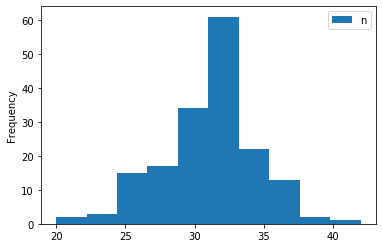

In [350]:
output.plot(kind='hist')

In [356]:
inTransmuteDir2 = "../transmuted.k=2/"
inTransmuteDir1 = "../transmuted.k=1/"
outTransmuteDir1 = "../transmuted.k=1.bombout/"
outTransmuteDir2 = "../transmuted.k=2.bombout/"
outOriginalDir = "../bomb21_bombout/"
inTransmuted2 = readStructs(inTransmuteDir2, shallow = False, name = 'input')['geom']
outTransmuted2 = readStructs(outTransmuteDir2, shallow = False, name = 'output')['geom']
inTransmuted1 = readStructs(inTransmuteDir1, shallow = False, name = 'input')['geom']
outTransmuted1 = readStructs(outTransmuteDir1, shallow = False, name = 'output')['geom']
outOriginal = readStructs(outOriginalDir, shallow = False, name = 'output')['geom']

In [357]:
view(outTransmuted1)

In [358]:
len(outTransmuted1)

85